# Homework 4: GMMs

## Part 1: Gaussian Mixture Model and EM using scikit learn (10 points)

### Generate data
Generate 400 samples randomly split between 4 clusters.

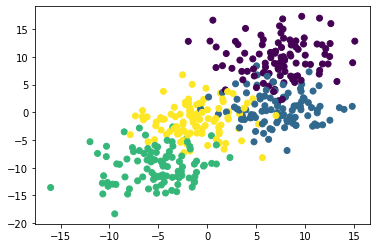

In [434]:
# Data generation process
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm

random_seed = 8

X, Y = make_blobs(n_samples=400, centers=4, n_features=2, cluster_std=3,
                  random_state=random_seed)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### Train GMMs

Train GMMs on the data you generated with at least two different values for `covariance_type`.

In [435]:
# Use thiX GMM module from sklearn
from sklearn.mixture import GaussianMixture

In [436]:
# Train models here
gmm_diag = GaussianMixture(n_components=4, covariance_type='diag', init_params='random', max_iter=1000, tol=10e-10)
gmm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='random', max_iter=1000,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=1e-09, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [437]:
gmm_sph = GaussianMixture(n_components=4, covariance_type='spherical', init_params='random', max_iter=1000, tol=10e-10)
gmm_sph.fit(X)

GaussianMixture(covariance_type='spherical', init_params='random',
                max_iter=1000, means_init=None, n_components=4, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=1e-09, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [438]:
gmm_tied = GaussianMixture(n_components=4, covariance_type='tied', init_params='random', max_iter=1000, tol=10e-10)
gmm_tied.fit(X)

GaussianMixture(covariance_type='tied', init_params='random', max_iter=1000,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=1e-09, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [439]:
gmm_full = GaussianMixture(n_components=4, covariance_type='full', init_params='random', max_iter=1000, tol=10e-10)
gmm_full.fit(X)

GaussianMixture(covariance_type='full', init_params='random', max_iter=1000,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=1e-09, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Plot
Plot the learned cluster assignments using the plotting function below.

In [440]:
def plot_data(X, Z=None, C=None):
    '''
    X: data points, n_samples x dim
    C: cluster centers, n_samples x dim
    Z: cluster assignments, n_samples
    '''

    if Z is None:
        plt.scatter(X[:, 0], X[:, 1], c='m', marker='x', alpha=0.5)
        if C is not None:
            plt.scatter(C[:, 0], C[:, 1], c='b', marker='o')
    else:
        colors = ['r', 'g', 'b', 'c']

        for k in range(C.shape[0]):
            plt.scatter(X[Z == k, 0], X[Z == k, 1], c=colors[k], marker='x', alpha=0.5)
            plt.scatter(C[k, 0], C[k, 1], c=colors[k], marker='s')

    plt.grid(True)
    plt.show()

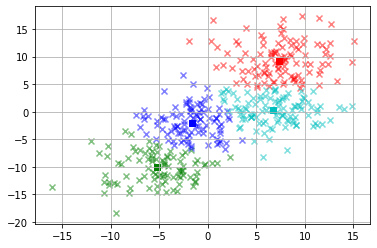

In [441]:
# Display plots here
plot_data(X, Z=gmm_diag.predict(X), C=gmm_diag.means_) 

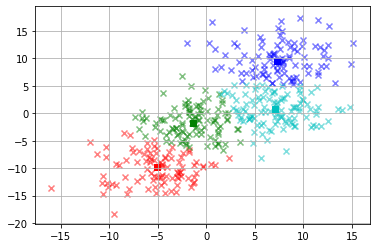

In [442]:
plot_data(X, Z=gmm_sph.predict(X), C=gmm_sph.means_)

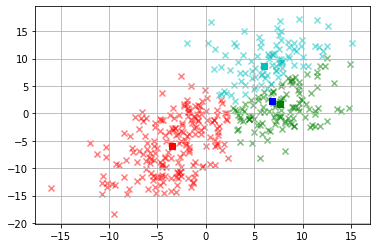

In [443]:
plot_data(X, Z=gmm_tied.predict(X), C=gmm_tied.means_)

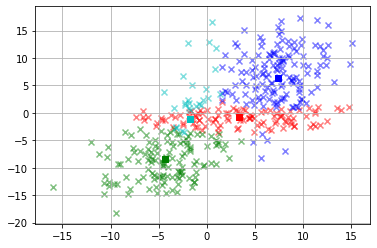

In [444]:
plot_data(X, Z=gmm_full.predict(X), C=gmm_full.means_)

### Discuss
Discuss the difference between models with different type of covariance matrices here.

There were two interesting findings. First, depending on a type of covariance matrices, models resulted in a different clustering over the same dataset. I could observe my choice of covariance matrices can bring me different result. Second, types of covariance matrices influence performance. I compared the accuracy of each types of covariance matrices below. For this dataset, spherical type of covariance matrix showed the best accuracy in both training accuracy and test accuracy. Full type of covariance matrix showed the second high training accuracy but tied type of covariance matrix showed the second high test accuracy. Lastly, diagonal type of covariance matrix showed the worst performance.

In [445]:
X_train = X[1:300]
y_train = Y[1:300]
X_test = X[301:400]
y_test = Y[301:400]

In [446]:
# Spherical
y_train_pred = gmm_sph.predict(X_train)
train_accuracy = numpy.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print("Spherical\n", "Train accuracy of covariance type 'spherical': ", train_accuracy)

y_test_pred = gmm_sph.predict(X_test)
test_accuracy = numpy.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print("Test accuracy of covariance type 'spherical': ", test_accuracy, '\n')

# full
y_train_pred = gmm_full.predict(X_train)
train_accuracy = numpy.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print("Train accuracy of covariance type 'full': ", train_accuracy)

y_test_pred = gmm_full.predict(X_test)
test_accuracy =numpy.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print("Test accuracy of covariance type 'full': ", test_accuracy, '\n')

# diag
y_train_pred = gmm_diag.predict(X_train)
train_accuracy = numpy.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print("Train accuracy of covariance type 'diag': ", train_accuracy)

y_test_pred = gmm_diag.predict(X_test)
test_accuracy = numpy.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print("Test accuracy of covariance type 'diag': ", test_accuracy, '\n')

# tied 
y_train_pred = gmm_tied.predict(X_train)
train_accuracy = numpy.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print("Train accuracy of covariance type 'tied': ", train_accuracy)

y_test_pred = gmm_tied.predict(X_test)
test_accuracy = numpy.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print("Test accuracy of covariance type 'tied': ", test_accuracy)

Spherical
 Train accuracy of covariance type 'spherical':  4.013377926421405
Test accuracy of covariance type 'spherical':  2.0202020202020203 

Train accuracy of covariance type 'full':  5.016722408026756
Test accuracy of covariance type 'full':  5.05050505050505 

Train accuracy of covariance type 'diag':  29.09698996655518
Test accuracy of covariance type 'diag':  34.34343434343434 

Train accuracy of covariance type 'tied':  21.73913043478261
Test accuracy of covariance type 'tied':  23.232323232323232


## Part 2: Gaussian mixture model and GD (10 points)

In this part you need to implement GMM training using gradient descent. You will use `jax` for automatic differention package to compute the gradient.

In [447]:
# Import dependencies
import jax.numpy as np
from jax import grad, jit

### Data
Generate 400 samples randomly split between 4 clusters. Sample code below is with `cluster_std` of 1 and `center_box` in (-5,5).

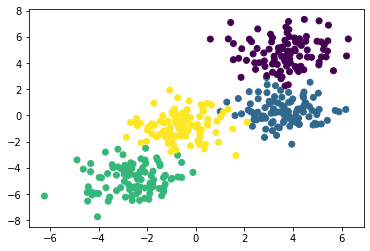

In [448]:
# Generate data
N = 400 # number of samples
n_components = 4 # number of clusters
d = 2 # data dimension
std_div = 1

X, Y = make_blobs(n_samples=N, centers=n_components, n_features=d, cluster_std=std_div, center_box = (-5,5),
                  random_state=random_seed)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### Parameters initialization
Initialize prior distribution and cluster means using function skeleton below.

### Attention: the prior is the probability $\pi_k$ of each cluster $k$ with $\sum_{k=1}^K \pi_k = 1$.

In [449]:
def initialize_parameters(n_samples, n_components, cluster_std=1):
    """
    Input
        n_samples: number of data points
        n_components: number of clusters 
    Output
        prior: the prior probability of each cluster, initialized at (1/n_components), (n_components)
        mu: randomly initialized clusters, (n_components, d)
    """
    prior = numpy.array([1.0 / n_components for i in range(n_components)])
    mu = numpy.random.randn(n_components, X.shape[-1])
    return prior, mu

### Likelihood given cluster
Compute the conditional likelihood of each data sample wrt each cluster center according to:

$$p(x~|~z_k)\sim\mathcal{N}(x| \mu_k, \Sigma_k)$$ 

where you can assume that $\Sigma_k$ is the identity.

In [450]:
def likelihood(X, mu):
    """
    Funciton which computes the likelihood of observed data given cluster centers: p(X|Z)
    Input
        X: data points, (n_samples x d)
        mu: cluster centers, (n_components x d)
    Outout
        likelihood: likelihood of X for each cluster, (n_samples x n_clusters)
    """
    likelihood = (1.0 / np.sqrt(2*np.pi) * np.exp((mu.T[None, :,:] - X[:,:, None])**2/2)).prod(1)
    return likelihood

### Marginalized negative log-likelihood
Using the likelihood:

$$ p(x_i) = \sum_{k=1}^K \pi_k \cdot p(x_i~|~z_k), $$

compute the marginalized negative log-likelihood of the data $X$: 

$$\mathrm{NLL} = -\sum_{i=1}^N \log(p(x_i)).$$ 

You should find the $\mathrm{likelihood}$ function from above helpful.

In [451]:
# Compute the marginalized negative log-likelihood 
def neg_ll(prior, mu, X):
    """
    Input
        prior: the probability of each cluster, (n_components)
        mu: clusters, (n_components, n_features)
        X: data samples, (n_samples x d)
    Output:
        nll: marginalized negative log-likelihood, scalar
    """
    nll = -(np.log((likelihood(X, mu)[None, :] * prior[None, :]).sum())).sum() # TODO
    return nll

### Gradient using jax
Use `jax` to keep track of the gradient with respect to the parameters (prior and means).

In [452]:
# Gradient function for marginalized negative log-likelihood wrt to prior and means mu
grad_nll = jit(grad(neg_ll, argnums = [0,1]))

### Trainig GMM with GD
Implement the GMM training with gradient descent.

In [453]:
# GMM with gradient descent
def gmm_gd(X, n_components, n_iter=10000, eta=1e-2, threshold=1e-2):
    """
    Input 
        X: data points, (n_samples x d)
        n_components: number of clusters
        n_iter: maximal number of training loop iterations, integer with default value of 10000 
        eta: learning rate for gradient descent, float with default value of 1e-2
        threshold: threshold for stopping criteria, float with default value of 1e-2
    Output:
        cluster_assignments: cluster assignment of each data sample, (n_samples, )
        mu: cluster centers, (n_components x d)
    """
    
    # Initialize parameters
    prior, mu = initialize_parameters(len(X), n_components)
    
    # Turn into jax.numpy array
    prior, mu = np.array(prior), np.array(mu)
    
    # Plot initialization 
    plot_data(X, Z=None, C=mu)
    
    # Training loop
    prev_cost = None
    for ni in range(n_iter):
        
        # Compute gradients for the prior and cluster means
        d_prior, d_mu = grad_nll(prior, mu, X) #TODO
        
        # Take a gradient step for the prior and cluster means
        mu -= eta * d_mu
        prior -= eta * d_prior
        
        # Normalize the prior probabilities so that they sum to 1 for each data sample
        # TODO
        prior = (likelihood(X,mu) * prior) / (likelihood(X,mu) * prior).sum(1)[:,None]

        # Compute the cost
        cost = neg_ll(prior, mu, X)
        
        # Log cost
        if (ni + 1) % 100 == 0 or (ni + 1) == n_iter or ni == 0:
            print("Iter {} cost: {:.2f}".format(ni+1, cost))
        
        # Early stopping
        if prev_cost is not None and prev_cost - cost < threshold:
            print("Iter {} cost: {:.2f}".format(ni+1, cost))
            break
        prev_cost = cost

    # Assign clusters
    cluster_assignments = np.argmax(prior, axis=1) # TODO

    return cluster_assignments, mu

### Data
Generate 400 samples randomly split between 4 clusters with `cluster_std` of 1 and `center_box` in (-5,5).

Train a GMM with GD on the data generated in the first step.

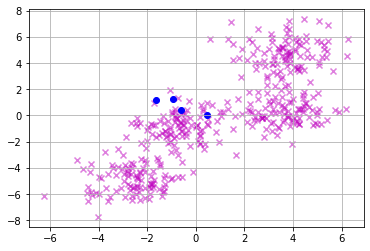

Iter 1 cost: -44.18
Iter 36 cost: -88.49


In [454]:
# Train GMM with GD
Z_gd, C_gd = gmm_gd(X, n_components)

In [455]:
print(Z_gd.shape)

(400,)


Plot the learned cluster means and assignments.

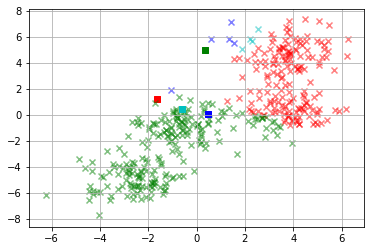

In [456]:
# Plot means and assignments
plot_data(X, Z_gd, C_gd)